# Assignment 1

In [1]:
# Import of all librairies needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, date
from scipy.stats import skew, kurtosis
from scipy.stats import norm
import requests
import warnings
warnings.filterwarnings('ignore')

# Question 1

In [2]:
# Import stocks data from yfinance
start_date = '2015-01-01'
end_date = '2020-12-01'
stocks = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
df = yf.download(tickers=stocks, start=start_date, end=end_date, auto_adjust=False)
df

[*********************100%***********************]  5 of 5 completed


Price        Adj Close                                                \
Ticker            AAPL        AMZN       GOOG        META       NFLX   
Date                                                                   
2015-01-02   24.237543   15.426000  25.990791   77.969337   4.984857   
2015-01-05   23.554739   15.109500  25.448997   76.717056   4.731142   
2015-01-06   23.556959   14.764500  24.859165   75.683441   4.650142   
2015-01-07   23.887274   14.921000  24.816576   75.683441   4.674285   
2015-01-08   24.805082   15.023000  24.894823   77.700989   4.777928   
...                ...         ...        ...         ...        ...   
2020-11-23  110.827545  154.919495  86.153419  266.785370  47.661999   
2020-11-24  112.112511  155.903000  87.842873  275.223328  48.287998   
2020-11-25  112.949669  159.253494  87.969505  273.901459  48.500000   
2020-11-27  113.494820  159.766998  89.050102  276.107849  49.136002   
2020-11-30  115.889496  158.401993  87.438637  275.273041  49.070000   

Price            Close                                                ...  \
Ticker            AAPL        AMZN       GOOG        META       NFLX  ...   
Date                                                                  ...   
2015-01-02   27.332500   15.426000  26.168653   78.449997   4.984857  ...   
2015-01-05   26.562500   15.109500  25.623152   77.190002   4.731142  ...   
2015-01-06   26.565001   14.764500  25.029282   76.150002   4.650142  ...   
2015-01-07   26.937500   14.921000  24.986401   76.150002   4.674285  ...   
2015-01-08   27.972500   15.023000  25.065184   78.180000   4.777928  ...   
...                ...         ...        ...         ...        ...  ...   
2020-11-23  113.849998  154.919495  86.742996  268.429993  47.661999  ...   
2020-11-24  115.169998  155.903000  88.444000  276.920013  48.287998  ...   
2020-11-25  116.029999  159.253494  88.571503  275.589996  48.500000  ...   
2020-11-27  116.589996  159.766998  89.659500  277.809998  49.136002  ...   
2020-11-30  119.050003  158.401993  88.037003  276.970001  49.070000  ...   

Price             Open                                                \
Ticker            AAPL        AMZN       GOOG        META       NFLX   
Date                                                                   
2015-01-02   27.847500   15.629000  26.378078   78.580002   4.911714   
2015-01-05   27.072500   15.350500  26.091366   77.980003   4.916450   
2015-01-06   26.635000   15.112000  25.679497   77.230003   4.735714   
2015-01-07   26.799999   14.875000  25.280592   76.760002   4.728714   
2015-01-08   27.307501   15.016000  24.831326   76.739998   4.711857   
...                ...         ...        ...         ...        ...   
2020-11-23  117.180000  155.835007  87.480003  270.890015  49.046001   
2020-11-24  113.910004  155.024994  86.525002  268.489990  47.883999   
2020-11-25  115.550003  157.093506  88.644501  278.140015  48.513000   
2020-11-27  116.570000  160.563004  88.654503  277.390015  48.658001   
2020-11-30  116.970001  160.423996  89.059196  276.029999  49.007999   

Price          Volume                                           
Ticker           AAPL      AMZN      GOOG      META       NFLX  
Date                                                            
2015-01-02  212818400  55664000  28951268  18177500  134748250  
2015-01-05  257142000  55484000  41196796  26452200  181650210  
2015-01-06  263188400  70380000  57998800  27399300  160379520  
2015-01-07  160423600  52806000  41301082  22045300   98500220  
2015-01-08  237458000  61768000  67071641  23961000   96242090  
...               ...       ...       ...       ...        ...  
2020-11-23  127959300  94178000  43232000  20990800   54165710  
2020-11-24  113874200  72042000  31560000  16930400   35578940  
2020-11-25   76499200  75808000  20916000  12467000   35986290  
2020-11-27   46691300  47858000  17698000   7808400   28057620  
2020-11-30  169410200  81278000  36476000  16693300   3530

Text(0, 0.5, 'Price')

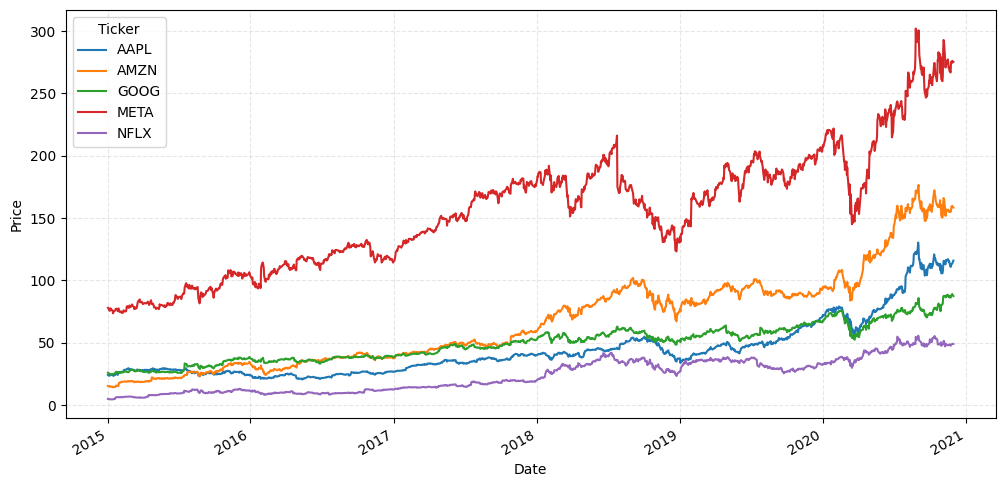

In [3]:
# Plot prices chart
df['Adj Close'].plot(figsize=(12,6))
plt.grid(True, alpha=0.3, linestyle='--')
plt.ylabel('Price')

In [4]:
# Calculation of returns
returns = df['Adj Close'].pct_change()
returns.dropna(inplace=True) # Drop the first line of NAs
returns.columns = pd.MultiIndex.from_product([['Returns'], returns.columns])
returns.head()

Returns                                        
Ticker          AAPL      AMZN      GOOG      META      NFLX
Date                                                        
2015-01-05 -0.028171 -0.020517 -0.020846 -0.016061 -0.050897
2015-01-06  0.000094 -0.022833 -0.023177 -0.013473 -0.017121
2015-01-07  0.014022  0.010600 -0.001713  0.000000  0.005192
2015-01-08  0.038422  0.006836  0.003153  0.026658  0.022173
2015-01-09  0.001073 -0.011749 -0.012951 -0.005628 -0.015443

Text(0.5, 1.0, 'Returns')

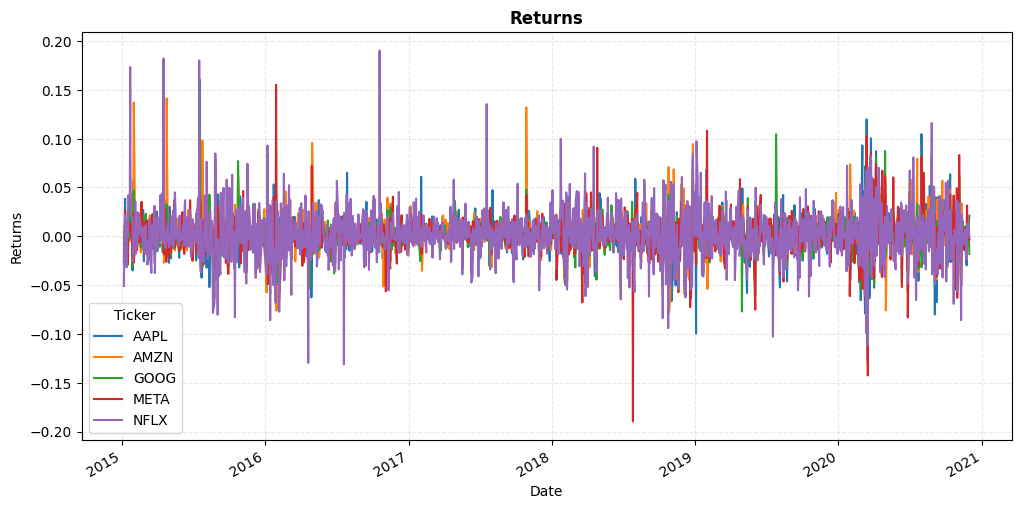

In [5]:
# Plot of stocks returns
returns['Returns'].plot(figsize=(12,6))
plt.grid(True, alpha=0.3, linestyle='--')
plt.ylabel('Returns')
plt.title('Returns', fontweight='bold')

In [6]:
# Calculation of variances
vars = returns['Returns'].var()
vars.head()

Ticker
AAPL    0.000349
AMZN    0.000384
GOOG    0.000290
META    0.000405
NFLX    0.000721
dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'AAPL'),
  Text(1, 0, 'AMZN'),
  Text(2, 0, 'GOOG'),
  Text(3, 0, 'META'),
  Text(4, 0, 'NFLX')])

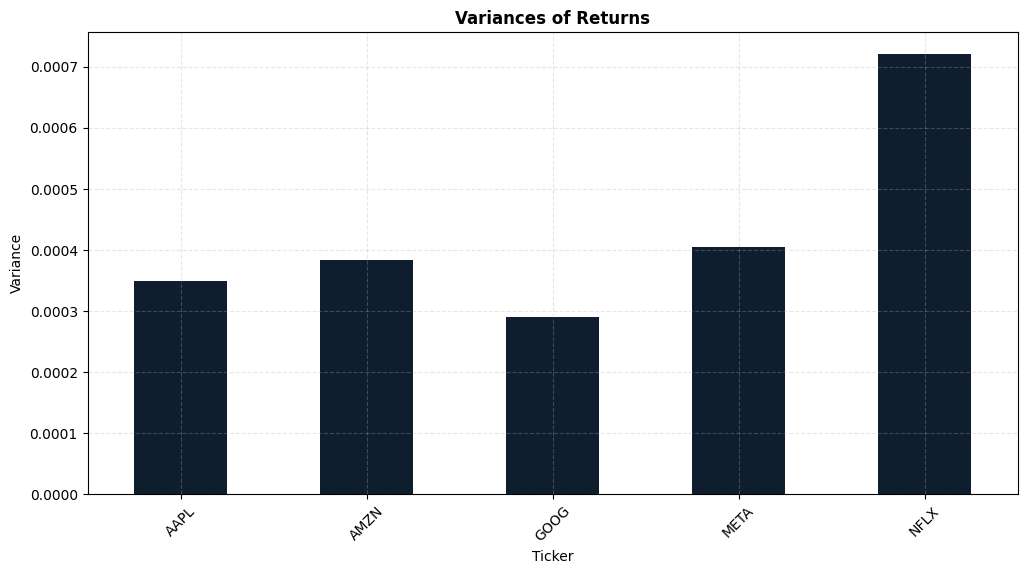

In [7]:
# Plot of variances
vars.plot.bar(figsize=(12,6), color="#0e1e2e")
plt.grid(True, alpha=0.3, linestyle='--')
plt.title('Variances of Returns', fontweight='bold')
plt.ylabel('Variance')
plt.xticks(rotation=45)

In [8]:
# Calculation of the covariance matrix
cov = returns['Returns'].cov()
cov

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,0.000349,0.000203,0.000193,0.000217,0.000208
AMZN,0.000203,0.000384,0.000218,0.000237,0.000277
GOOG,0.000193,0.000218,0.000290,0.000230,0.000219
META,0.000217,0.000237,0.000230,0.000405,0.000240
NFLX,0.000208,0.000277,0.000219,0.000240,0.000721


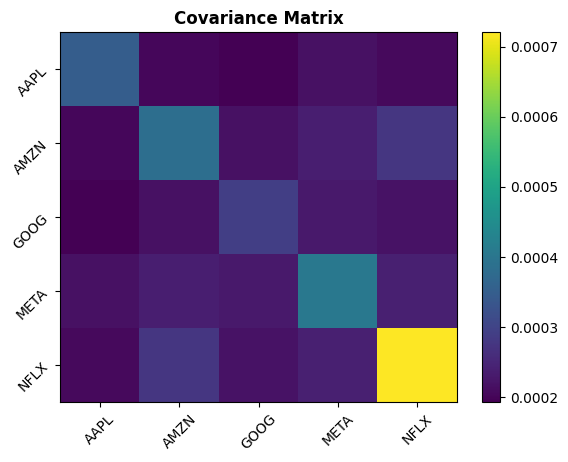

In [9]:
# Plot of the covariance matrix
plt.imshow(cov, aspect='auto', cmap='viridis')
plt.xticks(range(len(cov.columns)), cov.columns, rotation=45)
plt.yticks(range(len(cov.index)), cov.index, rotation=45)
plt.title("Covariance Matrix", fontweight='bold')
plt.colorbar()

In [10]:
# Calculation of Skew and Kurtosis
kurts = kurtosis(returns, fisher=True) # Excess Kurtosis
skews = skew(returns)

df_stats = pd.DataFrame({
    "Skew": skews,
    "Kurtosis": kurts
})

df_stats.index = returns['Returns'].columns 
df_stats

,Skew,Kurtosis
Ticker,,
AAPL,-0.093156,6.656303
AMZN,0.757282,7.137992
GOOG,0.513657,10.344667
META,-0.339112,12.026280
NFLX,0.684436,7.304960


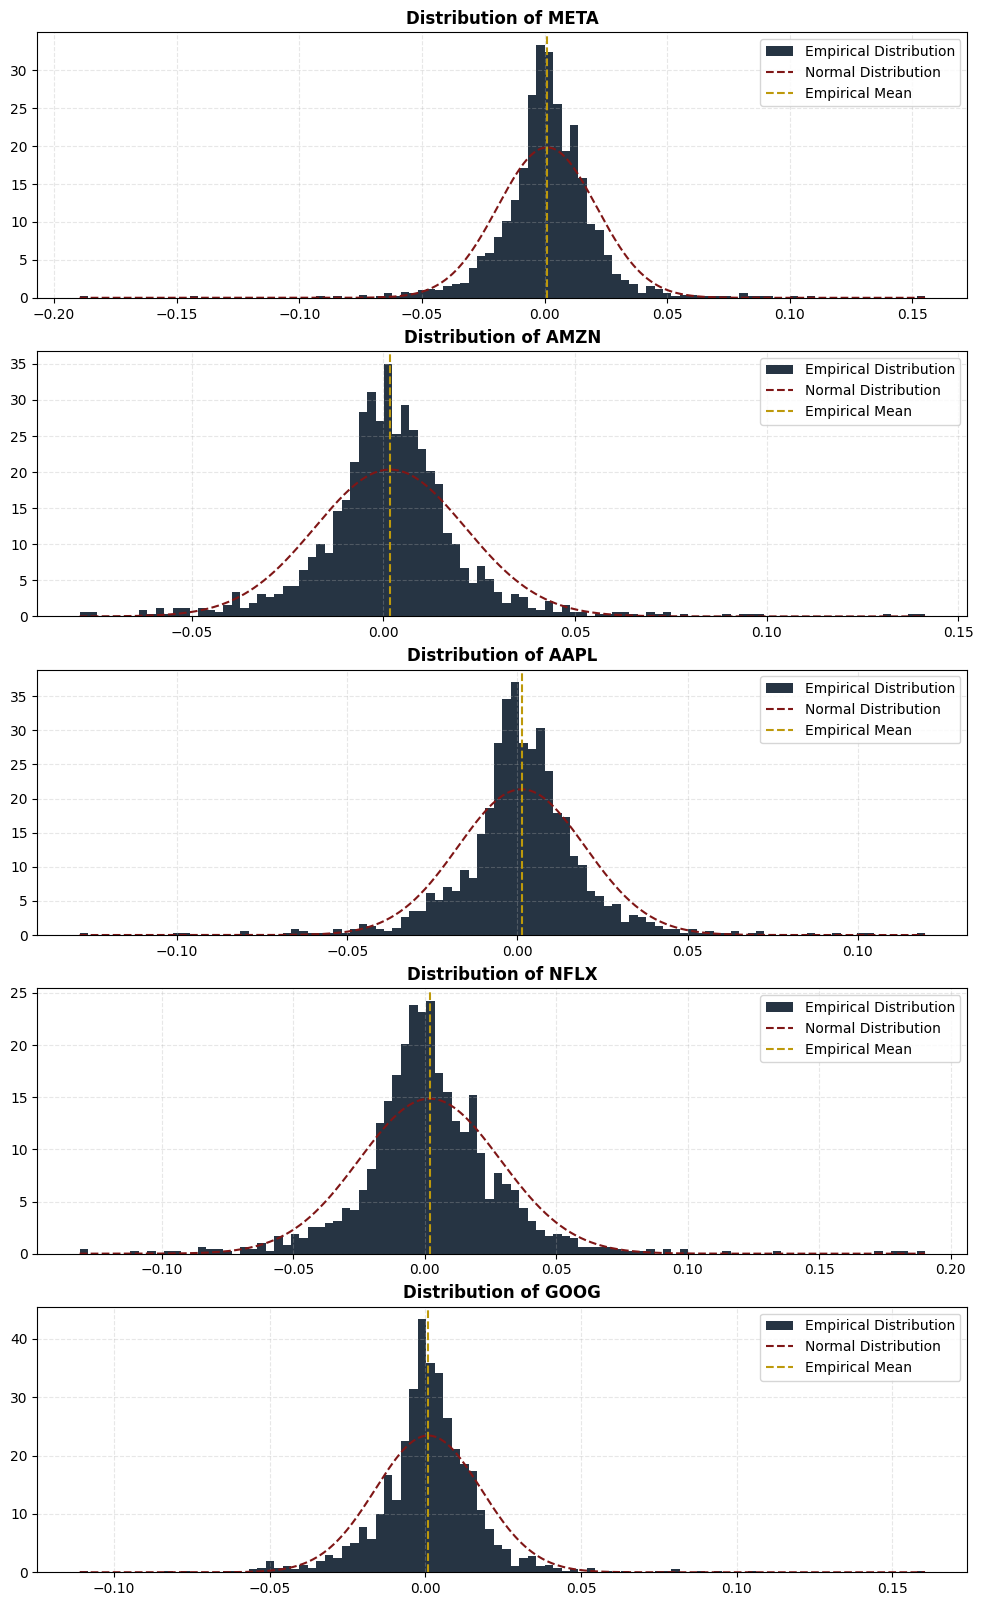

In [11]:
# Distribution of returns compared to the normal distribution

fig, axes = plt.subplots(len(stocks), 1, figsize=(12,20))
for i, col in enumerate(stocks):
    # Empirical Distribution of Returns
    data_rets = returns['Returns'][col]
    axes[i].hist(data_rets, bins=100, color="#0e1e2e", density=True, alpha=0.9, label='Empirical Distribution')
    # Normal Distribution
    mu, sigma = data_rets.mean(), data_rets.std()
    x_normal = np.linspace(data_rets.min(), data_rets.max(), 500)
    y_normal = norm.pdf(x_normal, mu, sigma)
    axes[i].plot(x_normal, y_normal, linestyle='--', c="#7F1616", label='Normal Distribution')
    # Means of Empirical Distributions
    axes[i].axvline(x=data_rets.mean(), c="#BD990B", linestyle='--', label='Empirical Mean')
    # Format on each axis
    axes[i].grid(True, alpha=0.3, linestyle='--')
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i].legend()

# Question 2

In [19]:
# Extraction of sp500 stocks from wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
data_web = pd.read_html(requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).text)
sp500 = data_web[1]
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-').dropna()
sp500_stocks = sp500['Symbol'].unique().tolist()

In [20]:
start_date = '2000-01-01'
end_date = '2022-12-31'
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [26]:
# Import sp500 stocks data from yfinance
sp500_prices = yf.download(tickers=sp500_stocks, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
sp500_prices = sp500_prices.drop(columns=['GEV', 'SOLV', 'VLTO', 'Q', 'KVUE', 'SOLS']) # Drop stocks that have only NaN entries

[*********************100%***********************]  503 of 503 completed

6 Failed downloads:
['KVUE', 'GEV', 'Q', 'VLTO', 'SOLV', 'SOLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 -> 2022-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 946702800, endDate = 1672462800")')


In [27]:
# Calculation of log returns
log_returns = np.log(sp500_prices / sp500_prices.shift(1))
log_returns = log_returns.iloc[1:] # Drop first NaN columm
log_returns.head()

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.079464,-0.088078,NaN,NaN,-0.028988,-0.005450,NaN,-0.087618,-0.051913,-0.010472,...,-0.038291,NaN,0.022765,-0.019340,NaN,NaN,-0.020305,NaN,-0.014533,NaN
2000-01-05,-0.064038,0.014527,NaN,NaN,-0.001840,0.088831,NaN,0.019578,0.014492,-0.015915,...,0.051619,NaN,0.037859,0.053082,NaN,NaN,0.005115,NaN,0.018963,NaN
2000-01-06,-0.038820,-0.090514,NaN,NaN,0.034392,-0.010050,NaN,0.008130,-0.027718,0.005333,...,0.045717,NaN,-0.009331,0.050405,NaN,NaN,-0.008540,NaN,-0.055665,NaN
2000-01-07,0.080043,0.046281,NaN,NaN,0.010620,0.054067,NaN,0.047440,0.027718,0.015831,...,-0.033436,NaN,0.000000,-0.002939,NaN,NaN,-0.022551,NaN,-0.011160,NaN
2000-01-10,0.058813,-0.017744,NaN,NaN,-0.007067,0.032944,NaN,0.037884,0.083468,0.000000,...,-0.004369,NaN,0.000000,-0.014080,NaN,NaN,0.039558,NaN,0.033114,NaN


In [23]:
# Annualized mean log returns
ann_log_rets = log_returns.mean()*252
ann_log_rets

Ticker
A       0.053313
AAPL    0.218953
ABBV    0.193794
ABNB   -0.256492
ABT     0.110807
          ...   
XYZ     0.221066
YUM     0.143102
ZBH     0.073715
ZBRA    0.101340
ZTS     0.163729
Length: 503, dtype: float64

In [24]:
ann_log_vol = log_returns.std() * np.sqrt(252)
ann_log_vol

Ticker
A       0.414503
AAPL    0.413075
ABBV    0.273179
ABNB    0.575365
ABT     0.245183
          ...   
XYZ     0.600667
YUM     0.287745
ZBH     0.283828
ZBRA    0.381976
ZTS     0.255319
Length: 503, dtype: float64

In [30]:
rf = 0.03
sharpe_ratios = (ann_log_rets - 0.03) / ann_log_vol
sharpe_ratios

Ticker
A       0.056243
AAPL    0.457430
ABBV    0.599587
ABNB   -0.497930
ABT     0.329579
          ...   
XYZ     0.318090
YUM     0.393062
ZBH     0.154018
ZBRA    0.186765
ZTS     0.523771
Length: 503, dtype: float64

It doesn't make sense to choose portfolio weights based only on the Sharpe Ratios of the stocks. In fact, the Sharpe Ratio ignores correlation between assets constituing the portfolio which may cause **no diversification**. Moreover, the Sharpe Ratio of the portfolio is not a weighted average of the Sharpe Ratios of each stock in our universe as it also depends on the **covariance matrix**.

As a conclusion, choosing weights from individual Sharpe Ratios may lead to a **poorly-diversified** and **risk-heavy** portfolio that ignores about joint correlation between assets.